In [4]:
# from IPython.display import Image
# Image(filename='double logos.png')

In [5]:
# Image(filename='predicting-stock-market-with-markov/markov.png')


In [6]:
# Image(filename='predicting-stock-market-with-markov/transition-matrix.png')


In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint

In [8]:
# load market data from Yahoo Finance (https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC)

gspc_df = pd.read_csv('^GSPC.csv')
gspc_df['Date'] = pd.to_datetime(gspc_df['Date'])

cut_off_date = '2010-01-01' 
gspc_df = gspc_df[gspc_df['Date'] >= cut_off_date]


gspc_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [9]:
# take random sets of sequential rows 
new_set = []
for row_set in range(0, 100000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(gspc_df)-row_quant)
    market_subset = gspc_df.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))

0
2018-11-28 00:00:00
2000
2015-12-13 00:00:00
4000
2018-06-23 00:00:00
6000
2016-12-27 00:00:00
8000
2016-11-03 00:00:00
10000
2017-06-23 00:00:00
12000
2020-04-18 00:00:00
14000
2016-08-06 00:00:00
16000
2016-06-06 00:00:00
18000
2019-12-05 00:00:00
20000
2017-02-09 00:00:00
22000
2020-03-19 00:00:00
24000
2017-05-09 00:00:00
26000
2020-09-14 00:00:00
28000
2017-01-04 00:00:00
30000
2016-01-05 00:00:00
32000
2018-07-08 00:00:00
34000
2020-10-13 00:00:00
36000
2019-07-20 00:00:00
38000
2017-04-22 00:00:00
40000
2020-03-30 00:00:00
42000
2017-02-12 00:00:00
44000
2019-11-23 00:00:00
46000
2017-08-04 00:00:00
48000
2017-03-29 00:00:00
50000
2018-09-15 00:00:00
52000
2020-03-08 00:00:00
54000
2019-07-30 00:00:00
56000
2017-01-09 00:00:00
58000
2019-01-31 00:00:00
60000
2018-06-24 00:00:00
62000
2017-12-07 00:00:00
64000
2017-08-03 00:00:00
66000
2018-11-14 00:00:00
68000
2019-01-28 00:00:00
70000
2016-01-08 00:00:00
72000
2020-03-19 00:00:00
74000
2018-08-03 00:00:00
76000
2017-03-28 00:

Time series plot

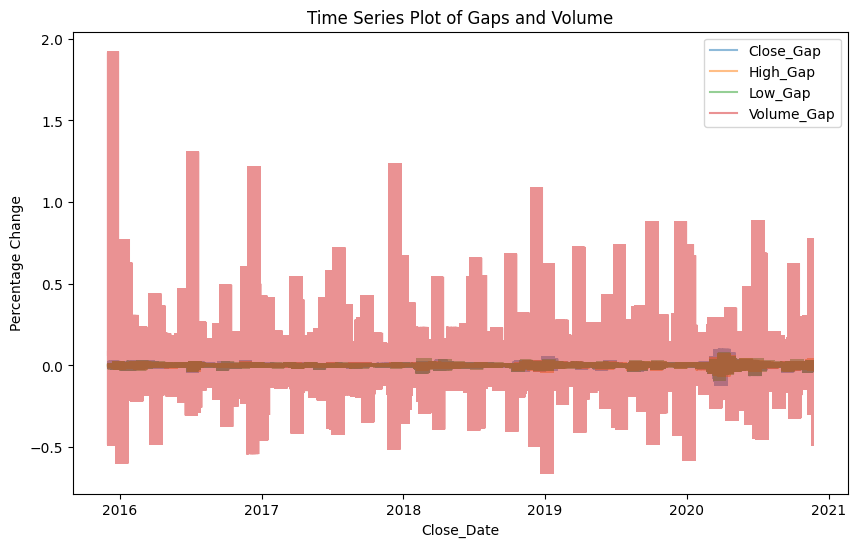

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate all subsets into a single DataFrame
combined_data = pd.concat(new_set)

plt.figure(figsize=(10, 6))

# Plot all features in a single diagram
plt.plot(combined_data['Close_Date'], combined_data['Close_Gap'], label='Close_Gap', alpha=0.5)
plt.plot(combined_data['Close_Date'], combined_data['High_Gap'], label='High_Gap', alpha=0.5)
plt.plot(combined_data['Close_Date'], combined_data['Low_Gap'], label='Low_Gap', alpha=0.5)
plt.plot(combined_data['Close_Date'], combined_data['Volume_Gap'], label='Volume_Gap', alpha=0.5)

plt.xlabel('Close_Date')
plt.ylabel('Percentage Change')
plt.title('Time Series Plot of Gaps and Volume')
plt.legend()
plt.show()


Histograms

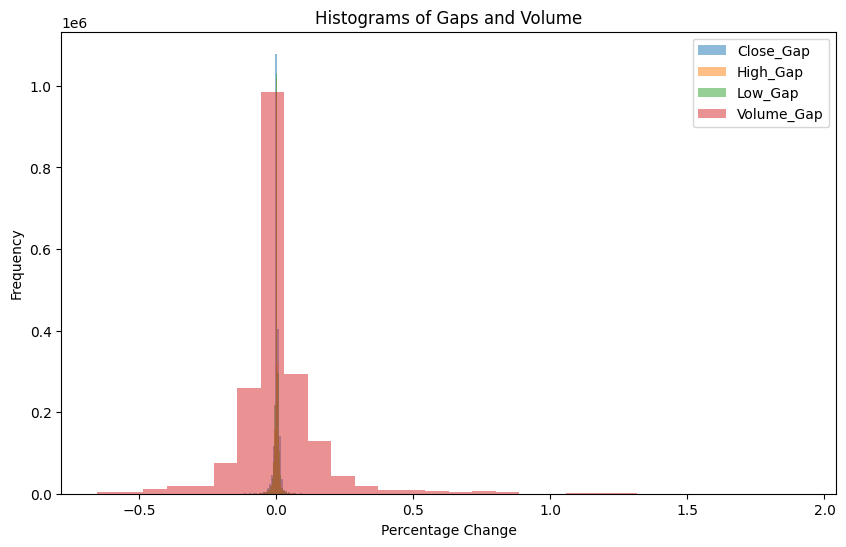

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate all subsets into a single DataFrame
combined_data = pd.concat(new_set)

plt.figure(figsize=(10, 6))

# Plot histograms for each feature in a single diagram
plt.hist(combined_data['Close_Gap'], bins=30, alpha=0.5, label='Close_Gap')
plt.hist(combined_data['High_Gap'], bins=30, alpha=0.5, label='High_Gap')
plt.hist(combined_data['Low_Gap'], bins=30, alpha=0.5, label='Low_Gap')
plt.hist(combined_data['Volume_Gap'], bins=30, alpha=0.5, label='Volume_Gap')

plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.title('Histograms of Gaps and Volume')
plt.legend()
plt.show()


Correlation matrix

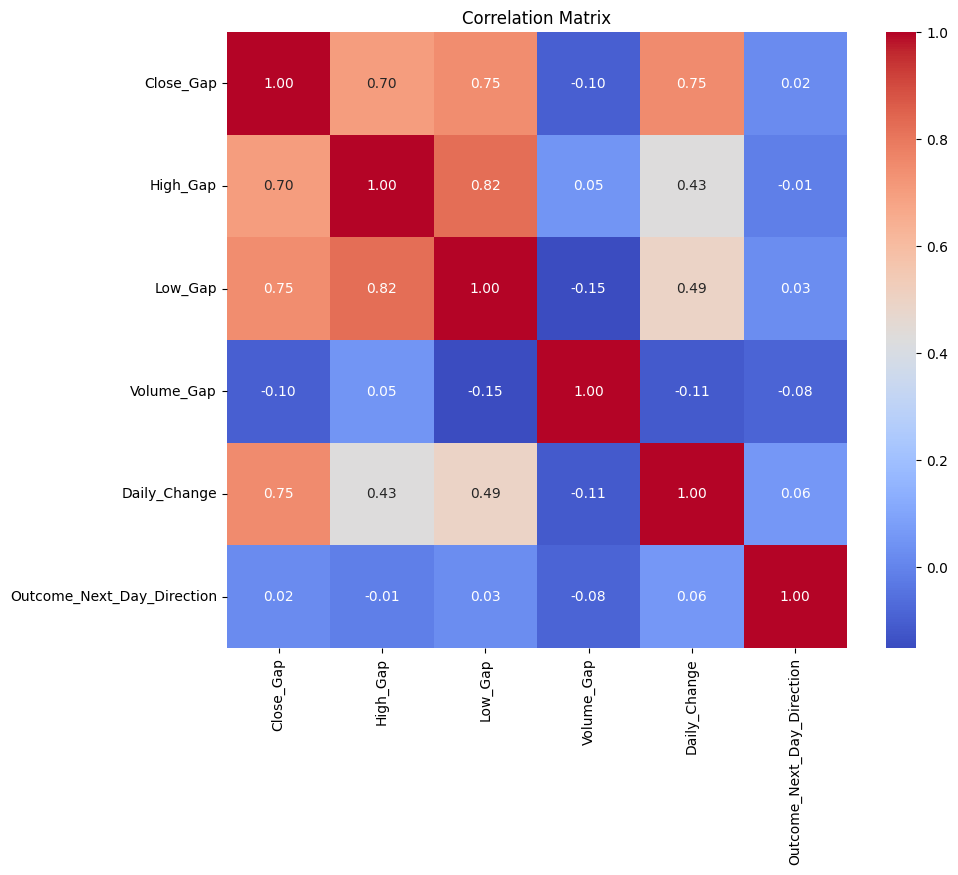

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate all subsets into a single DataFrame
combined_data = pd.concat(new_set)

plt.figure(figsize=(10, 8))

# Compute the correlation matrix for all features
correlation_matrix = combined_data[['Close_Gap', 'High_Gap', 'Low_Gap', 'Volume_Gap', 'Daily_Change', 'Outcome_Next_Day_Direction']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
len(market_subset)

30

In [14]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(2000203, 8)
(1800203, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
1658,99999,2020-06-27,0.000000,0.000000,0.000000,0.000000,0.009511,-1.802100e+08
1659,99999,2020-06-27,0.012042,0.006666,0.010165,-0.020912,0.010147,-2.054760e+09
1660,99999,2020-06-27,-0.007799,-0.003223,-0.000904,-0.243531,-0.001911,1.882200e+08
1661,99999,2020-06-27,-0.005313,0.000174,-0.003639,0.029489,-0.007245,4.480500e+08
1662,99999,2020-06-27,-0.058944,-0.030944,-0.057206,0.068188,-0.038876,-1.186640e+09
1663,99999,2020-06-27,0.013061,-0.011241,-0.005008,-0.169064,-0.009681,0.000000e+00
1664,99999,2020-06-27,0.000000,0.000000,0.000000,0.000000,-0.009681,0.000000e+00
1665,99999,2020-06-27,0.000000,0.000000,0.000000,0.000000,-0.009681,-9.159000e+07
1666,99999,2020-06-27,0.008312,-0.002804,-0.006303,-0.015704,0.024327,8.858000e+07
1667,99999,2020-06-27,0.018962,0.023927,0.037226,0.015430,-0.001999,-1.279850e+09


In [15]:
new_set_df.head()


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
1075,0,2018-11-28,-0.006317,0.005427,-0.003105,-0.099925,-0.008155,0.0
1076,0,2018-11-28,0.000000,0.000000,0.000000,0.000000,-0.008155,0.0
1077,0,2018-11-28,0.000000,0.000000,0.000000,0.000000,-0.008155,-614610000.0
1078,0,2018-11-28,0.005600,-0.004455,0.006480,-0.145026,0.004379,-112460000.0
1079,0,2018-11-28,0.006259,0.004573,0.007042,-0.031038,0.006226,403890000.0


In [16]:
# confirm sequence
# new_set_df[new_set_df['Close_Date'] == '1973-06-27'] {HLH, HLH, HHH, HHH, LLL, LML, LML, LLL, LHL, ...	

In [17]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)

In [18]:
new_set_df.tail(10)


,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
1668,99999,2020-06-27,L,L,L,-1.203600e+08,LLL
1669,99999,2020-06-27,M,L,H,3.898750e+09,MLH
1670,99999,2020-06-27,L,H,L,0.000000e+00,LHL
1671,99999,2020-06-27,L,M,L,0.000000e+00,LML
1672,99999,2020-06-27,L,M,L,-3.662400e+09,LML
1673,99999,2020-06-27,H,L,H,3.945000e+07,HLH
1674,99999,2020-06-27,H,H,L,8.823700e+08,HHL
1675,99999,2020-06-27,L,H,L,-7.717800e+08,LHL
1676,99999,2020-06-27,H,L,H,3.282700e+09,HLH
1677,99999,2020-06-27,L,H,L,0.000000e+00,LHL


In [19]:
new_set_df['Outcome_Next_Day_Direction'].describe()


count    1.800203e+06
mean     8.935596e+05
std      5.917178e+08
min     -4.995080e+09
25%     -1.333800e+08
50%      0.000000e+00
75%      1.406600e+08
max      4.299510e+09
Name: Outcome_Next_Day_Direction, dtype: float64

In [20]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head()

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2018-11-28,"{LLL, LML, LML, HLH, HLH, HHH, LLM, LHL, LML, ..."
1,1,2018-09-14,"{HLM, HHM, LLM, LHM, HLH, LMH, LMH, HHH, MLL, ..."
2,2,2015-12-15,"{LHL, HLH, LMH, LMH, LLL, LHL, LHL, HLM, LHL, ..."
3,3,2018-06-16,"{LMM, LHL, HLH, LHL, HLH, LMH, LMH, HLM, MHM, ..."
4,4,2018-04-21,"{HLH, HLH, HLM, LHL, LML, LML, HLL, HHH, LLM, ..."


In [21]:
compressed_set['Sequence_ID'].values

array([    0,     1,     2, ..., 99997, 99998, 99999])

In [22]:
#compressed_outcomes = new_set_df[['Sequence_ID', 'Close_Date', 'Outcome_Next_Day_Direction']].groupby(['Sequence_ID', 'Close_Date']).agg()

compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,1.049595e+06
std,28867.657797,7.839243e+07
min,0.000000,-6.589012e+08
25%,24999.750000,-2.828812e+07
50%,49999.500000,5.388000e+05
75%,74999.250000,2.972562e+07
max,99999.000000,5.830725e+08


In [23]:
 
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2018-11-28,"{LLL, LML, LML, HLH, HLH, HHH, LLM, LHL, LML, ...",-1.101000e+07
1,1,2018-09-14,"{HLM, HHM, LLM, LHM, HLH, LMH, LMH, HHH, MLL, ...",1.607120e+07
2,2,2015-12-15,"{LHL, HLH, LMH, LMH, LLL, LHL, LHL, HLM, LHL, ...",3.920833e+06
3,3,2018-06-16,"{LMM, LHL, HLH, LHL, HLH, LMH, LMH, HLM, MHM, ...",1.280805e+08
4,4,2018-04-21,"{HLH, HLH, HLM, LHL, LML, LML, HLL, HHH, LLM, ...",-2.344444e+05


In [24]:
# # reduce set 

# compressed_set = new_set_df.groupby(['Sequence_ID', 'Close_Date','Outcome_Next_Day_Direction'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2018-11-28,"LLL,LML,LML,HLH,HLH,HHH,LLM,LHL,LML,LML,LLL,LH...",-1.101000e+07
1,1,2018-09-14,"HLM,HHM,LLM,LHM,HLH,LMH,LMH,HHH,MLL,HHH,LHL,MH...",1.607120e+07
2,2,2015-12-15,"LHL,HLH,LMH,LMH,LLL,LHL,LHL,HLM,LHL,LML,LML,HHH",3.920833e+06
3,3,2018-06-16,"LMM,LHL,HLH,LHL,HLH,LMH,LMH,HLM,MHM,HHH,LHL,HL...",1.280805e+08
4,4,2018-04-21,"HLH,HLH,HLM,LHL,LML,LML,HLL,HHH,LLM,HMH,LLL,LM...",-2.344444e+05


In [25]:
# # use last x days of data for validation
# compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
#                                            - datetime.timedelta(days=90)] # Sys.Date()-90 

# compressed_set_validation.shape

In [26]:
compressed_set_validation = compressed_set.tail(90)
compressed_set_validation.columns

Index(['Sequence_ID', 'Close_Date', 'Event_Pattern',
       'Outcome_Next_Day_Direction'],
      dtype='object')

In [27]:
compressed_set_validation['Sequence_ID'].values

array([99910, 99911, 99912, 99913, 99914, 99915, 99916, 99917, 99918,
       99919, 99920, 99921, 99922, 99923, 99924, 99925, 99926, 99927,
       99928, 99929, 99930, 99931, 99932, 99933, 99934, 99935, 99936,
       99937, 99938, 99939, 99940, 99941, 99942, 99943, 99944, 99945,
       99946, 99947, 99948, 99949, 99950, 99951, 99952, 99953, 99954,
       99955, 99956, 99957, 99958, 99959, 99960, 99961, 99962, 99963,
       99964, 99965, 99966, 99967, 99968, 99969, 99970, 99971, 99972,
       99973, 99974, 99975, 99976, 99977, 99978, 99979, 99980, 99981,
       99982, 99983, 99984, 99985, 99986, 99987, 99988, 99989, 99990,
       99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998, 99999])

In [28]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(100000, 4)

In [29]:
list(compressed_set)


['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [30]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

##Keep big moves only and build outcome variable

In [31]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count    1.000000e+05
mean     1.049595e+06
std      7.839243e+07
min     -6.589012e+08
25%     -2.828812e+07
50%      5.388000e+05
75%      2.972562e+07
max      5.830725e+08
Name: Outcome_Next_Day_Direction, dtype: float64

In [32]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

100000


79345

In [33]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))

all moves: 100000
big moves only: 79345


In [34]:
compressed_set.head()


,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
0,0,"LLL,LML,LML,HLH,HLH,HHH,LLM,LHL,LML,LML,LLL,LH...",0
1,1,"HLM,HHM,LLM,LHM,HLH,LMH,LMH,HHH,MLL,HHH,LHL,MH...",1
3,3,"LMM,LHL,HLH,LHL,HLH,LMH,LMH,HLM,MHM,HHH,LHL,HL...",1
5,5,"HLH,HLH,HLM,LHL,LML,LML,HLL,HHH,LLM,HMH,LLL,LM...",1
7,7,"LMH,HMH,HLM,HLM,HHH,LLM,LMM,LMM",0


In [35]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(39953, 2)
(39392, 2)


In [36]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)


26

In [37]:
unique_patterns

['LMH',
 'MLH',
 'HLH',
 'LLL',
 'HHL',
 'HLM',
 'HHM',
 'LHH',
 'HHH',
 'MHL',
 'MLM',
 'LLH',
 'HML',
 'MMM',
 'MMH',
 'LLM',
 'LHL',
 'MHM',
 'MLL',
 'MHH',
 'LML',
 'HLL',
 'HMH',
 'LMM',
 'HMM',
 'LHM']

In [38]:
compressed_set['Outcome_Next_Day_Direction'].head()       


0    0
1    1
3    1
5    1
7    0
Name: Outcome_Next_Day_Direction, dtype: int64

Build the markov transition grid

In [39]:
compressed_set_validation['Sequence_ID'].values

array([99910, 99911, 99912, 99913, 99914, 99915, 99916, 99917, 99918,
       99919, 99920, 99921, 99922, 99923, 99924, 99925, 99926, 99927,
       99928, 99929, 99930, 99931, 99932, 99933, 99934, 99935, 99936,
       99937, 99938, 99939, 99940, 99941, 99942, 99943, 99944, 99945,
       99946, 99947, 99948, 99949, 99950, 99951, 99952, 99953, 99954,
       99955, 99956, 99957, 99958, 99959, 99960, 99961, 99962, 99963,
       99964, 99965, 99966, 99967, 99968, 99969, 99970, 99971, 99972,
       99973, 99974, 99975, 99976, 99977, 99978, 99979, 99980, 99981,
       99982, 99983, 99984, 99985, 99986, 99987, 99988, 99989, 99990,
       99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998, 99999])

In [40]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})
    

    #grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    #grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(',', 1, expand=True)
    # Assuming 'pairs' column contains strings like 'x,y'
    grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(',', n=1, expand=True)


    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    #del grid_Df.index.name

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)


In [41]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns)

In [42]:
grid_neg.head()


,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LML,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.087105,0.064570,0.125388,0.105016,0.115192,0.133291,0.036347,0.000000,0.000000,0.105221,...,0.007556,0.001619,0.000000,0.230350,0.026393,0.000000,0.13918,0.084901,NaN,0.0
HHL,0.006702,0.000000,0.000000,0.006036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007514,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN,0.0
HHM,0.012967,0.000000,0.061228,0.024932,0.000000,0.052336,0.000000,0.894309,0.112576,0.000000,...,0.017036,0.078785,0.375378,0.000000,0.123443,0.138756,0.00000,0.151784,NaN,0.0
HLH,0.165947,0.479581,0.118721,0.102090,0.128296,0.067864,0.000000,0.000000,0.172752,0.000000,...,0.009763,0.000000,0.340634,0.306226,0.113279,0.244338,0.00000,0.204342,NaN,0.0
HLL,0.008684,0.000000,0.013684,0.016327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041869,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN,0.0


In [43]:
grid_pos.head()


,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LML,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.104315,0.106071,0.172179,0.075130,0.187444,0.169935,0.184444,0.000000,0.000000,0.127469,...,0.014913,0.006194,0.000000,0.067471,0.136724,0.000000,0.158444,0.060561,0.0,0.0
HHL,0.019845,0.000000,0.000000,0.014849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
HHM,0.042627,0.000000,0.109904,0.051502,0.000000,0.028890,0.000000,1.155039,0.125506,0.000000,...,0.007719,0.053253,0.078835,0.000000,0.132761,0.184858,0.000000,0.163663,0.0,0.0
HLH,0.131877,0.345520,0.135704,0.063425,0.016521,0.046621,0.000000,0.000000,0.065452,0.000000,...,0.014672,0.000000,0.200994,0.014016,0.019375,0.052997,0.000000,0.105517,0.0,0.0
HLL,0.014219,0.000000,0.006672,0.003211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [44]:
len(grid_pos.columns)

26

In [45]:
grid_pos.columns

Index(['HHH', 'HHL', 'HHM', 'HLH', 'HLL', 'HLM', 'HMH', 'HML', 'HMM', 'LHH',
       'LHL', 'LHM', 'LLH', 'LLL', 'LLM', 'LMH', 'LML', 'LMM', 'MHH', 'MHL',
       'MHM', 'MLH', 'MLL', 'MLM', 'MMH', 'MMM'],
      dtype='object')

In [46]:
# compressed_set_validation[compressed_set_validation['Sequence_ID' == seq_id]]

In [47]:
compressed_set_validation['Sequence_ID'].values

array([99910, 99911, 99912, 99913, 99914, 99915, 99916, 99917, 99918,
       99919, 99920, 99921, 99922, 99923, 99924, 99925, 99926, 99927,
       99928, 99929, 99930, 99931, 99932, 99933, 99934, 99935, 99936,
       99937, 99938, 99939, 99940, 99941, 99942, 99943, 99944, 99945,
       99946, 99947, 99948, 99949, 99950, 99951, 99952, 99953, 99954,
       99955, 99956, 99957, 99958, 99959, 99960, 99961, 99962, 99963,
       99964, 99965, 99966, 99967, 99968, 99969, 99970, 99971, 99972,
       99973, 99974, 99975, 99976, 99977, 99978, 99979, 99980, 99981,
       99982, 99983, 99984, 99985, 99986, 99987, 99988, 99989, 99990,
       99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998, 99999])

In [48]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])


outcome: 1
1.00582387864382
1.7310219636094875
outcome: 1
nan
nan
outcome: 1
1.1584322597026009
2.597692269892057
outcome: 1
0.9723475549846967
-0.9476602392695509
outcome: 1
0.9790672618305117
0.506372643698169
outcome: 1
0.9751328485080473
-0.05080225313923192
outcome: 0
0.9847206979038997
0.0678170221914405
outcome: 1
1.0925087218026353
2.19173423145506
outcome: 1
0.988161977174051
-0.12744162512023988
outcome: 0
0.9476076034834423
-1.9606475679942572
outcome: 0
1.0340718776038063
1.7416699397022841
outcome: 1
0.9241934914238085
-2.0162191532020595
outcome: 0
0.936270901832043
-2.3091527893648207
outcome: 1
0.9374407988604957
-0.12821857236498024
outcome: 0
1.0565083719140311
2.697951419737521
outcome: 0
0.949691312933199
-2.0478351332772378
outcome: 1
1.021244894246411
4.114946515278963
outcome: 0
0.9707661474827655
2.3387381909837357
outcome: 1
1.0677800199921021
3.3879519904329496
outcome: 0
0.9837952642460684
-0.18047626061657787
outcome: 0
1.006341737278315
0.9856477135699924
o

array([[ 9, 32],
       [23, 26]])

In [50]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 38.89 %


In [51]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
cm

array([[ 9, 32],
       [23, 26]])

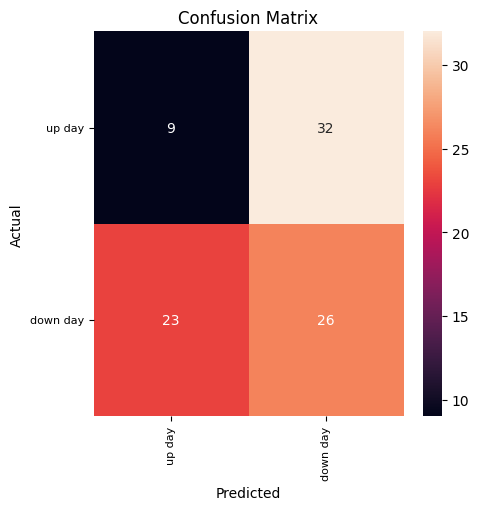

In [52]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()